## 2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ucimlrepo import fetch_ucirepo 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load dataset
df = pd.read_csv("student_social_media.csv")

# Check first few rows
df.head()



,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
# overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


In [4]:
# dropping the student id column, since that was not relevant to this section. finding the mean/median/std
df = df.drop('Student_ID', axis=1)
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [5]:
# dropping the count row, since that was the same number throughout the row. finding the mean/median/std with no "count" row
desc = df.describe()
desc_no_count = desc.drop('count', axis=0)
desc_no_count

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


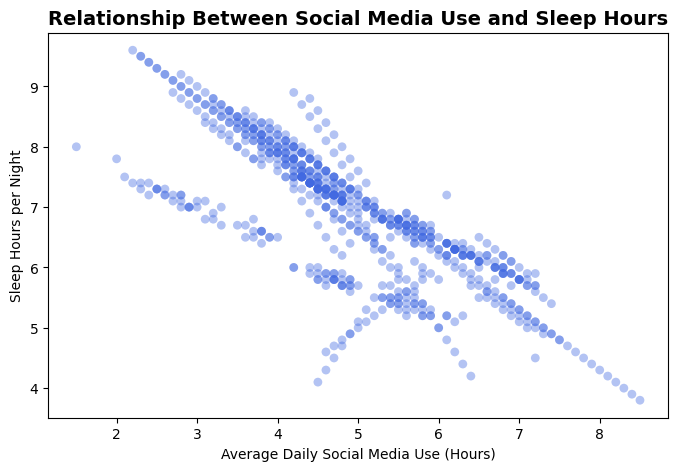

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Avg_Daily_Usage_Hours',
    y='Sleep_Hours_Per_Night',
    color='royalblue',
    s=40,
    alpha=0.4,        
    edgecolor='none'
)
plt.title("Relationship Between Social Media Use and Sleep Hours", fontsize=14, fontweight='bold')
plt.xlabel("Average Daily Social Media Use (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.show()

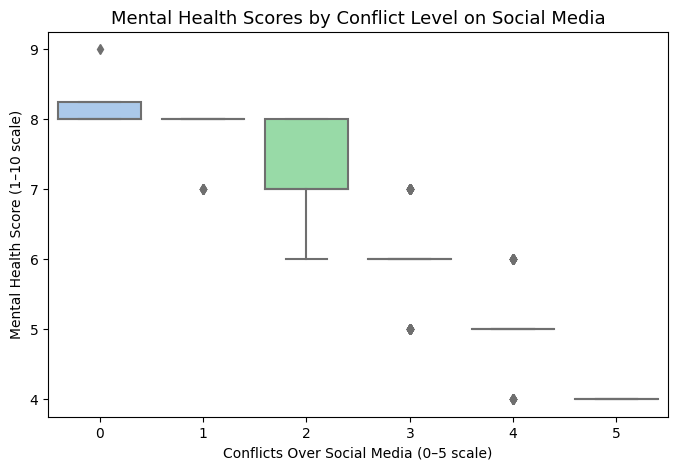

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Conflicts_Over_Social_Media',
    y='Mental_Health_Score',
    palette='pastel'
)
plt.title("Mental Health Scores by Conflict Level on Social Media", fontsize=13)
plt.xlabel("Conflicts Over Social Media (0–5 scale)")
plt.ylabel("Mental Health Score (1–10 scale)")

plt.show()

## 2.2 Unsupervised Method (K-Means Clustering)

For unsupervised methods, I will be using K-Means Clustering. I hope to discover and understand the different groups of students based on their social media habits and well-being indicators. This learning method would allow me to understand patterns within the data. An example of this could be clustering students who use social media heavily and report high stress, whereas there would be students who use it more regularly/moderated and are able to maintain better sleep or focus habits. 

By using this method, I hope to get a better understanding of how different patterns of usage correspond to different levels of well being and mental health. The results from clustering can show insights like what kinds of social media behaviors are associated with positive/negative outcomes. These insights would help design the end platform. For example, the system could give personalized feedback or visual summaries to show users what cluster they are a part of. It could alos help show how other usage patterns are being used and potentially even give new ideas of healthy habits that can be formed based on group characteristics. 

From this, I hope to turn data driven patterns into understandable categories to make a interactive and relevant experience for students. 

## 2.3 - visualizing K-Means Clustering

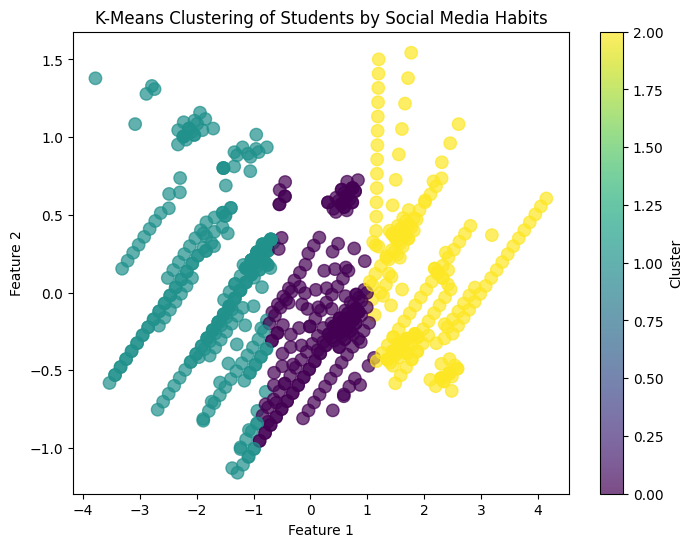

In [8]:
features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score']
data = df[features].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(scaled_data)

# apply k-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c=clusters, cmap='viridis', s=80, alpha=0.7)
plt.title("K-Means Clustering of Students by Social Media Habits")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()

The K-Means clustering analysis showed that there are three distinct groups of students that show different social media habits and mental health patterns. For the image above, we can see the each cluster gave a clear grouping that shows differences in behavior. One cluster could represent students with high screen time and high stress levels, whereas another one may be students with moderate use and balanced well being, and the last one could be very low social media use and higher focus. These clusters show that social media usage and well being are not linearly related. It is actually the students experiences that help the categories be defined. 

These results align with my expectations that social media habits would vary from student to student and correlate with factors like stress or focus. Seeing these clusters helps support the idea that patterns in social media are correlated with lifestyle trends. For example, higher social media usage would cluster with higer stress or less sleep. These insights will help shape my project of creating a reflective experience for students to help understand their behaviors and add a context to it. These insights will hepl make the platform personalized, helping students reflect on their choices and help them become aware of their habits and how social media may be affecting it. 